## Download MNIST

In [1]:
!pip install -q torchvision matplotlib tqdm

In [2]:
from torchvision import datasets
import torchvision.transforms as T
import torch

transform = T.Compose([
    T.ToTensor(),
    T.Lambda(lambda x: torch.flatten(x)),
])
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=transform)

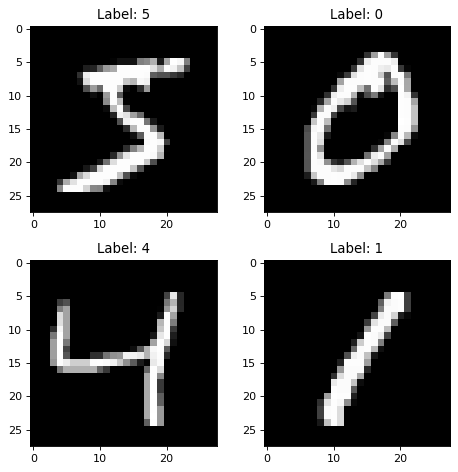

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % train_dataset[i][1])
    plt.imshow(train_dataset[i][0].numpy().reshape([28, 28]), cmap='gray');
fig.tight_layout()

## Feed-forward net

In [4]:
import torch.nn as nn
import torch.nn.functional as F

embedding_size = train_dataset[0][0].shape[0]

class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [5]:
assert embedding_size == 28 * 28

In [6]:
train_dataset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
model = Net()
print(model)
list(model.parameters())

Net(
  (fc1): Linear(in_features=784, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)


[Parameter containing:
 tensor([[ 0.0052, -0.0297,  0.0212,  ..., -0.0072, -0.0042, -0.0283],
         [ 0.0119,  0.0015,  0.0035,  ..., -0.0126, -0.0307,  0.0262],
         [-0.0255,  0.0304,  0.0314,  ...,  0.0100, -0.0118,  0.0302],
         ...,
         [-0.0053, -0.0267,  0.0007,  ..., -0.0261,  0.0018,  0.0314],
         [ 0.0284, -0.0235, -0.0162,  ...,  0.0010,  0.0311, -0.0205],
         [-0.0280,  0.0330,  0.0046,  ...,  0.0236,  0.0011,  0.0350]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0222, -0.0233, -0.0272, -0.0066,  0.0292, -0.0058, -0.0330, -0.0094,
          0.0035, -0.0181,  0.0140, -0.0172,  0.0127, -0.0167,  0.0356,  0.0240,
          0.0173, -0.0176,  0.0237,  0.0247,  0.0189, -0.0304, -0.0113, -0.0091,
         -0.0113,  0.0032,  0.0035,  0.0308,  0.0261,  0.0177,  0.0258, -0.0003,
          0.0262, -0.0084,  0.0083,  0.0164, -0.0228, -0.0301,  0.0235,  0.0087],
        requires_grad=True),
 Parameter containing:
 tensor([[-0.0966, -0.0333

In [8]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
)
print(model)
list(model.parameters())

Sequential(
  (0): Linear(in_features=784, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=40, bias=True)
  (3): ReLU()
  (4): Linear(in_features=40, out_features=10, bias=True)
)


[Parameter containing:
 tensor([[-0.0273, -0.0044,  0.0100,  ..., -0.0245,  0.0302, -0.0147],
         [-0.0340,  0.0188, -0.0037,  ..., -0.0355,  0.0347,  0.0149],
         [-0.0343, -0.0120, -0.0134,  ..., -0.0338,  0.0129,  0.0227],
         ...,
         [-0.0039,  0.0262,  0.0254,  ..., -0.0194,  0.0085,  0.0024],
         [ 0.0247,  0.0261, -0.0019,  ..., -0.0009, -0.0209,  0.0137],
         [-0.0284,  0.0034, -0.0276,  ..., -0.0109,  0.0355,  0.0189]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0178, -0.0140, -0.0070,  0.0209,  0.0293, -0.0089,  0.0276,  0.0046,
          0.0066,  0.0282,  0.0282, -0.0282,  0.0087,  0.0062, -0.0148, -0.0086,
          0.0064,  0.0338,  0.0307,  0.0138,  0.0338,  0.0046, -0.0340,  0.0001,
          0.0028,  0.0146, -0.0174, -0.0122,  0.0241, -0.0322, -0.0278, -0.0334,
          0.0136,  0.0080, -0.0166,  0.0135,  0.0049,  0.0237,  0.0128, -0.0318],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0003, -0.0465

In [9]:
from torch.utils.data import DataLoader

train_batchsize, test_batchsize = 128, 128
train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

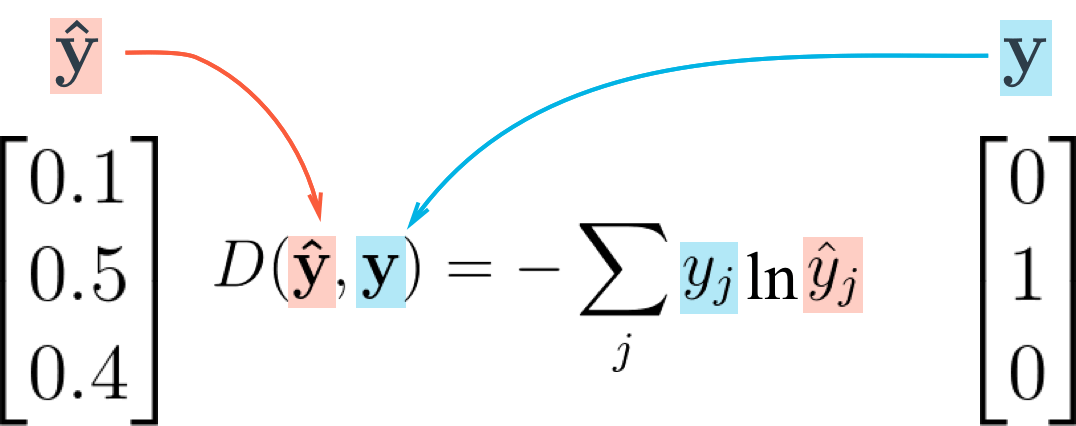

In [34]:
from tqdm import tqdm
import torch
from IPython.display import clear_output
import numpy as np


def compute_loss(y_pred, y_true):
    return F.cross_entropy(y_pred, y_true)


def train_epoch(model: torch.nn.Sequential, optimizer: torch.optim.Optimizer, device: torch.device):
    loss_log, acc_log = [], []

    model.train()
    for x_batch, y_batch in tqdm(train_dataloader, leave=False, desc='Train epoch'):
        # move input tensors to gpu
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        # forget previous grads
        optimizer.zero_grad()
        # forward pass
        output = model(x_batch)
        # compute loss
        loss = compute_loss(output, y_batch)
        # compute gradients
        loss.backward()
        # make a step
        optimizer.step()

        # compute and log accuracy
        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc = acc.cpu().item()
        acc_log.append(acc)

        # log loss
        loss = loss.cpu().item()
        loss_log.append(loss)
    return loss_log, acc_log


@torch.inference_mode()
def test(model: torch.nn.Sequential, device: torch.device):
    loss_log, acc_log = [], []

    model.eval()
    for x_batch, y_batch in tqdm(test_dataloader, leave=False, desc='Test'):
        # move input tensors to gpu
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        # infer model
        output = model(x_batch)

        # compute and log accuracy
        pred = torch.max(output, 1).indices
        acc = (pred == y_batch).sum() / y_batch.shape[0]
        acc = acc.cpu().item()
        acc_log.append(acc)

        # compute and log loss
        loss = compute_loss(output, y_batch)
        loss = loss.cpu().item()
        loss_log.append(loss)

    return loss_log, acc_log


def plot_history(train_history, test_history, epoch, title='loss'):
    plt.figure()

    plt.title('{} at {} epoch'.format(title, epoch + 1))
    plt.plot(train_history, label='train', zorder=1)

    points = torch.tensor(test_history)

    plt.scatter(points[:, 0], points[:, 1], marker='+', s=180, c='orange', label='test', zorder=2)
    plt.xlabel('train steps')

    plt.legend(loc='best')
    plt.grid()

    plt.show()


def train_loop(model: torch.nn.Sequential, opt: torch.optim.Optimizer, device: torch.device, epochs=10):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt, device)
        test_loss, test_acc = test(model, device)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')
    return test_acc_log[-1][1]

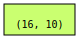

In [35]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device)

## Initialization

Let's see default probability distribution for torch layers

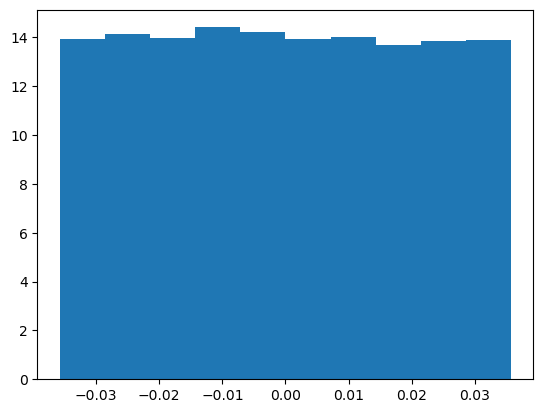

In [12]:
default_init_tensor = Net().fc1.weight.data
plt.hist(default_init_tensor.reshape(-1), density=True)
plt.show()

Seems like Uniform...

According to [pytorch docs](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear):

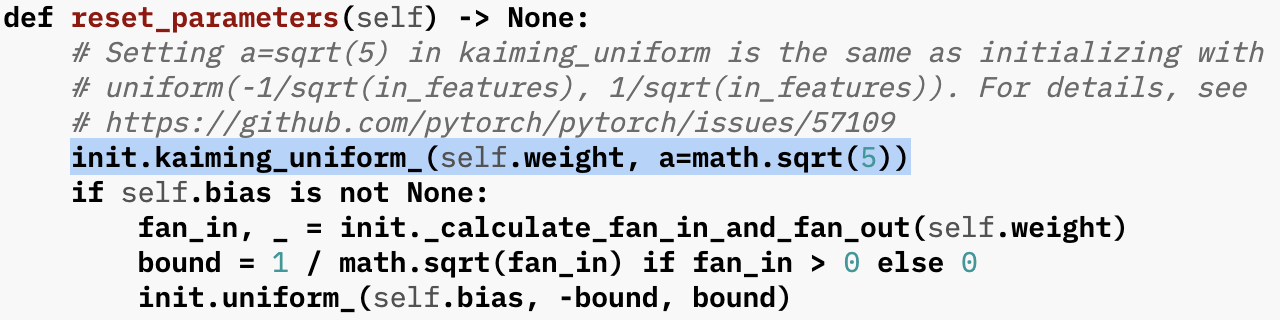

kaiming_uniform:

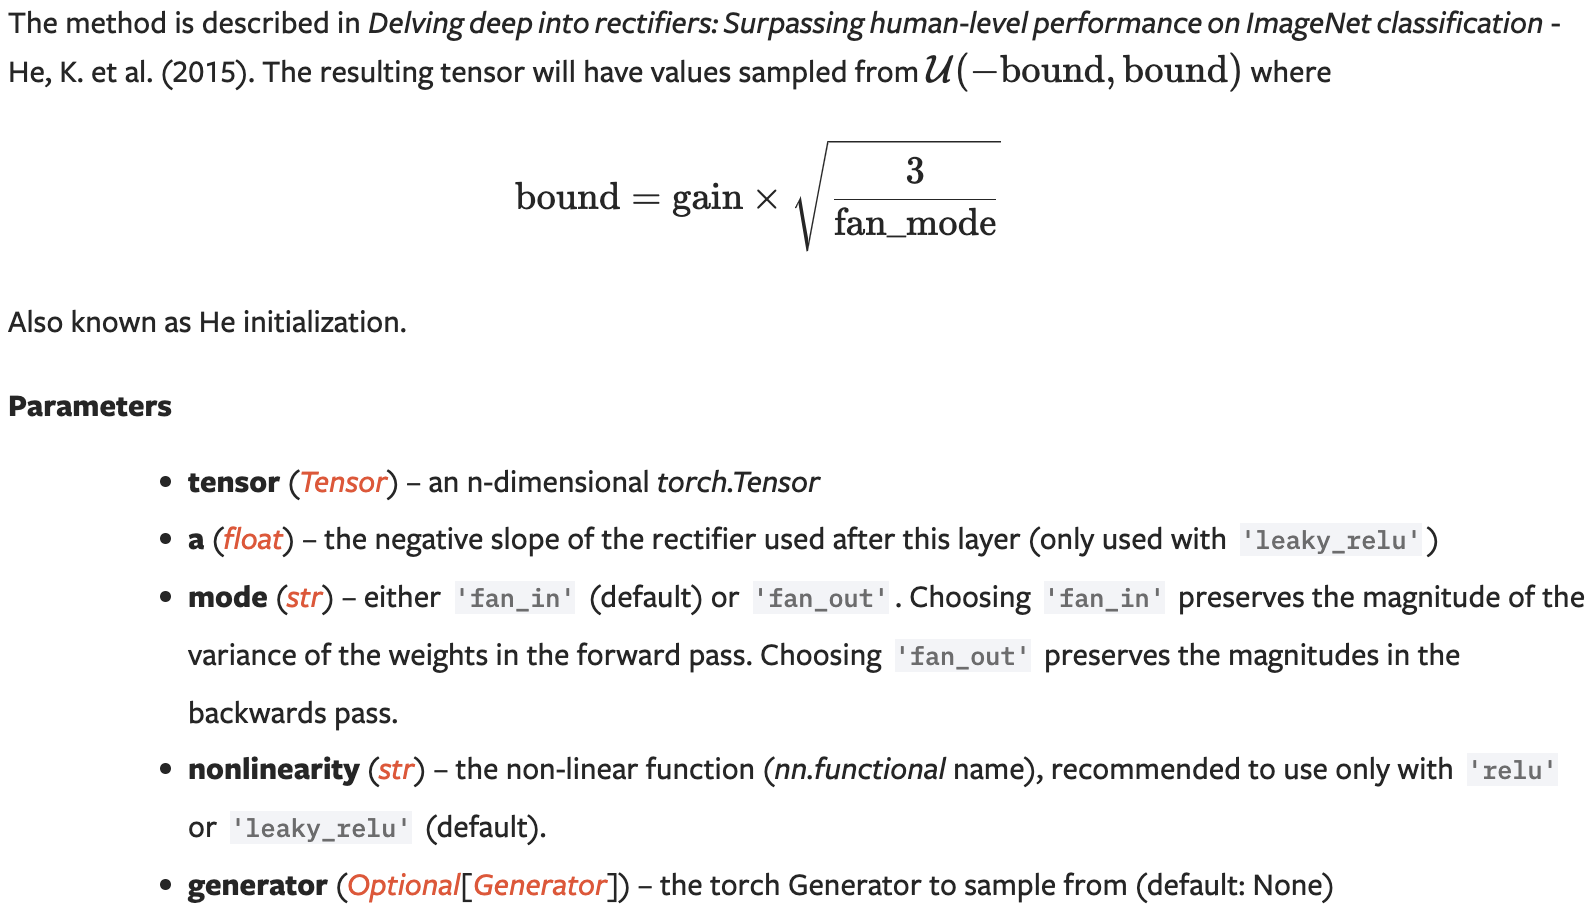

## Improving results

### Model

#### Better init

In [13]:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

        # init for relu activation
        torch.nn.init.kaiming_uniform_(self.fc1.weight, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.fc2.weight, nonlinearity='relu')
        torch.nn.init.kaiming_uniform_(self.fc3.weight, nonlinearity='relu')

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [14]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device)

KeyboardInterrupt: 

To test other features in equal environment

In [15]:
class Net(nn.Module):
    def __init__(self, hidden_size=40):
        super(Net, self).__init__()
        # here you construct weights for layers
        self.fc1 = nn.Linear(embedding_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 10)

    def forward(self, x):
        # here you describe usage of layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

#### Stack more layers :)

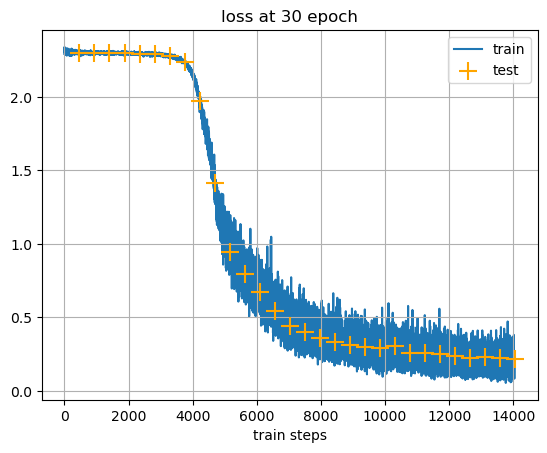

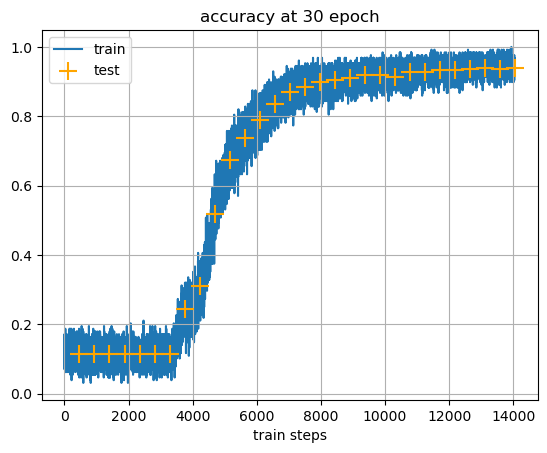

Last accuracy: 0.9382911392405063


In [16]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),

    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device, epochs=30)

Data Science ;)

But know your limits

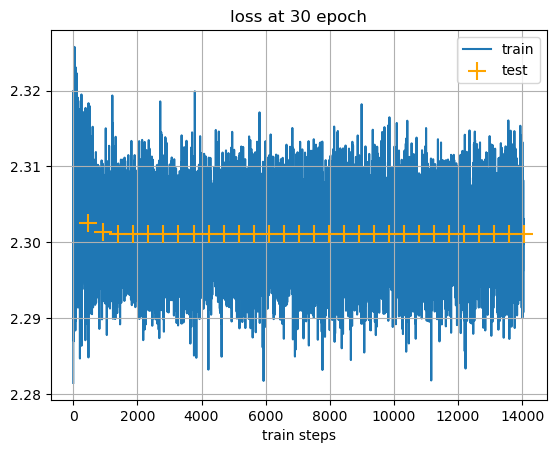

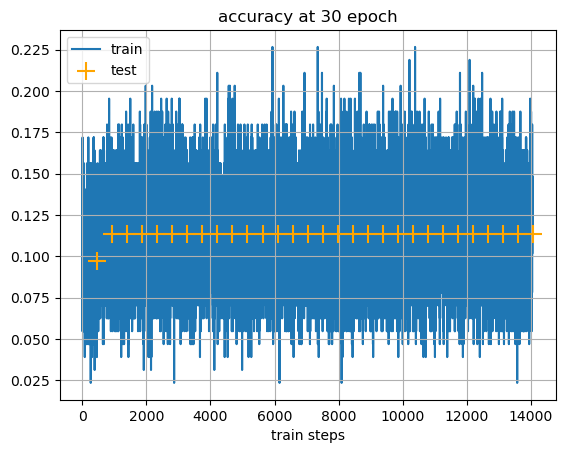

Last accuracy: 0.11362737341772151


In [17]:
modules = [nn.Linear(embedding_size, hidden_size), nn.ReLU()]
for _ in range(20):
    modules.extend([nn.Linear(hidden_size, hidden_size), nn.ReLU()])
modules.append(nn.Linear(hidden_size, 10))
model = nn.Sequential(*modules).to(device=device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device, epochs=30)

$1 / 10 \approx 0.11$ --> random

Why is the network frozen?

#### Wider layers

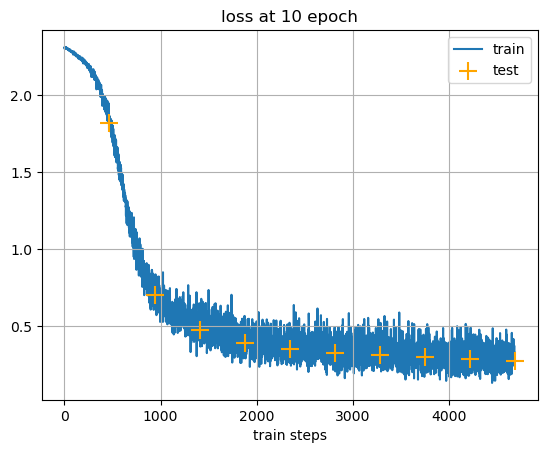

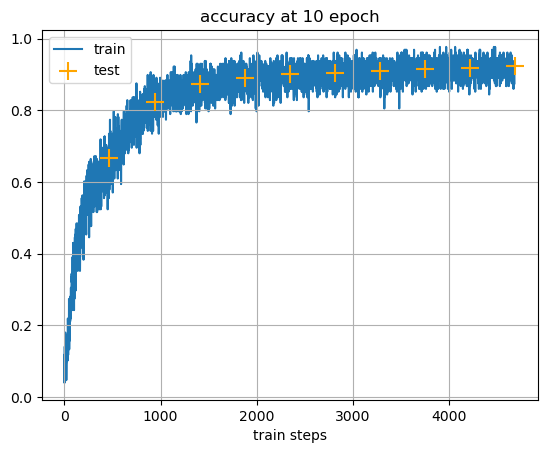

Last accuracy: 0.9220727848101266


In [19]:
hidden_size = 512
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device)

#### DropOut

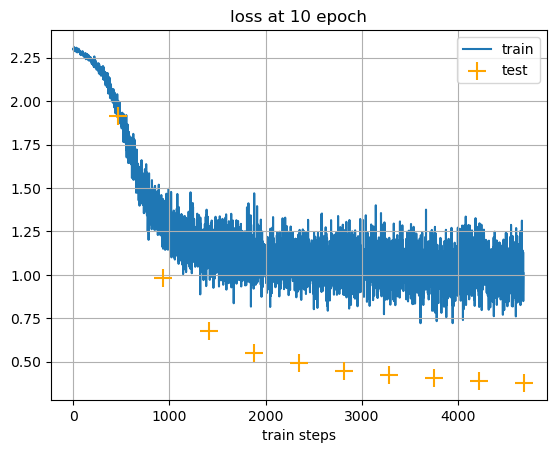

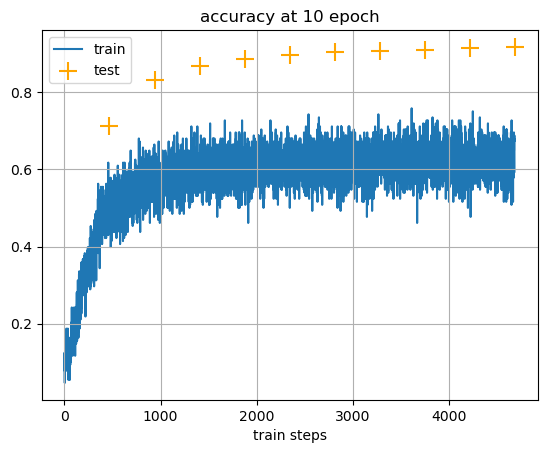

Last accuracy: 0.9166337025316456


In [20]:
p = 0.2
hidden_size = int(40 / p)
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.Dropout1d(p=p),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.Dropout1d(p=p),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device)

Usually hard to set up well

#### BatchNorm

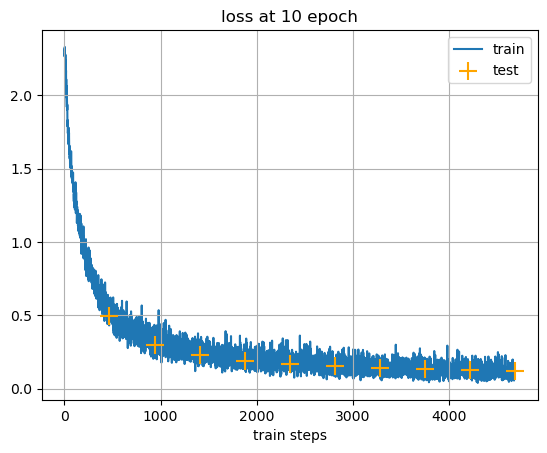

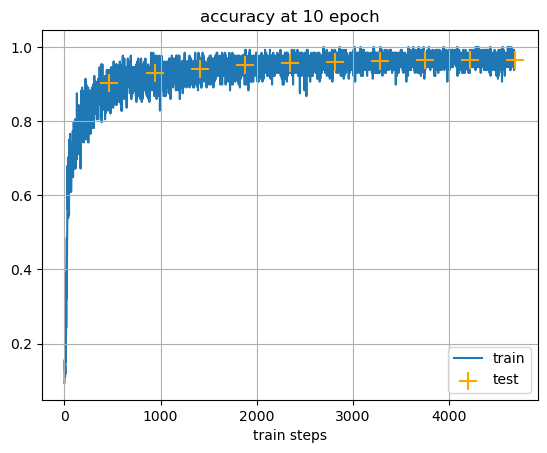

Last accuracy: 0.9659810126582279


In [21]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device)

Quite easy and powerful

But which sequence is the best?

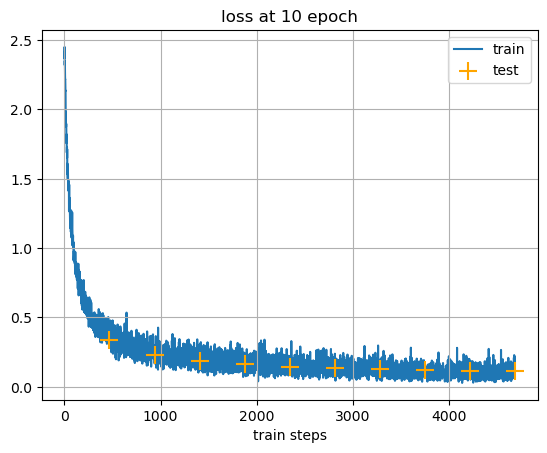

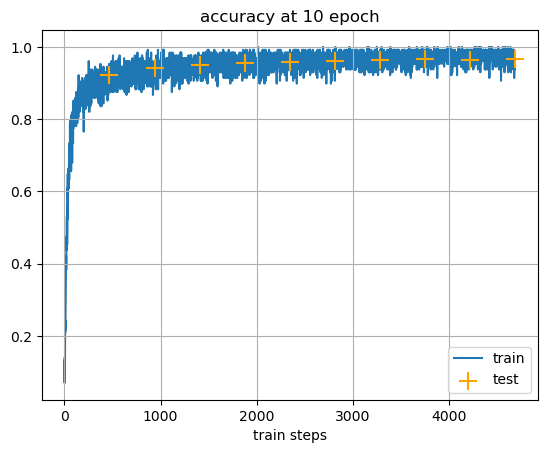

Last accuracy: 0.9654865506329114


In [22]:
hidden_size = 40
model = nn.Sequential(
    nn.Linear(embedding_size, hidden_size),
    nn.ReLU(),
    nn.BatchNorm1d(hidden_size),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.BatchNorm1d(hidden_size),
    nn.Linear(hidden_size, 10),
).to(device)

opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device)

### Data

#### Augmentations

Instead of `torchvision.transforms` better use [`albumentations`](https://albumentations.ai/docs/getting_started/transforms_and_targets/) (faster + wider choice of transforms)

In [23]:
train_transform = T.Compose([
    T.ToTensor(),
    T.RandomRotation(5),
    T.Lambda(lambda x: torch.flatten(x)),
])
test_transform = T.Compose([
    T.ToTensor(),
    T.Lambda(lambda x: torch.flatten(x)),
])

train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=train_transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=test_transform)

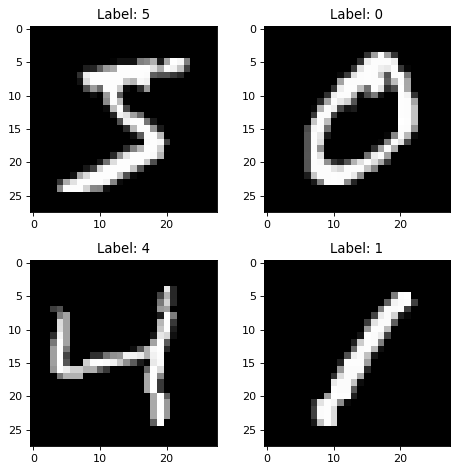

In [24]:
fig = plt.figure(figsize=[6, 6], dpi=80)
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.title("Label: %i" % train_dataset[i][1])
    plt.imshow(train_dataset[i][0].numpy().reshape([28, 28]), cmap='gray');
fig.tight_layout()

In [25]:
train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

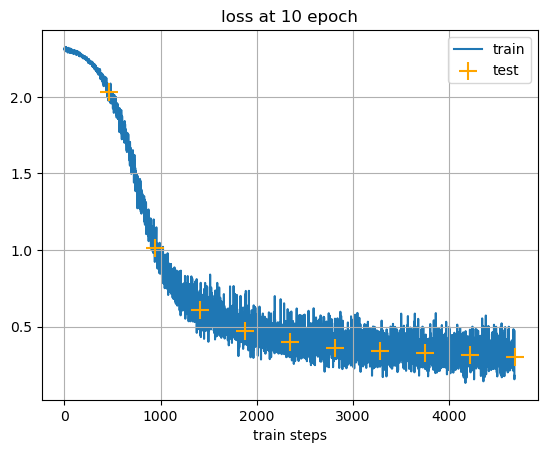

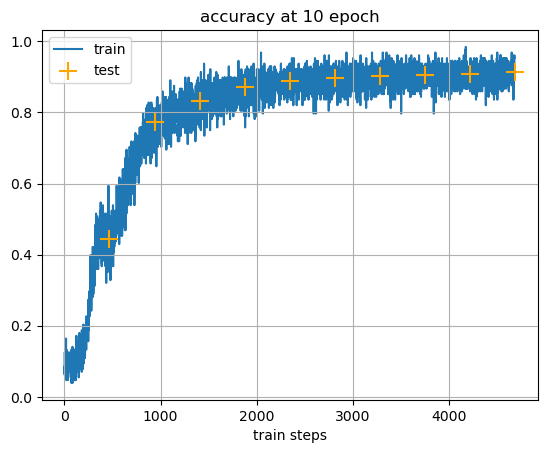

Last accuracy: 0.9127768987341772


In [29]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device)

To test other features in equal environment

In [28]:
train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=test_transform)
test_dataset = datasets.MNIST(root='data', train=False, download=False, transform=test_transform)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=train_batchsize,
    shuffle=True,
    drop_last=True,
)
test_dataloader  = DataLoader(
    test_dataset,
    batch_size=test_batchsize,
    shuffle=False,
)

#### Syntetics

### Optimization

#### Optimizer

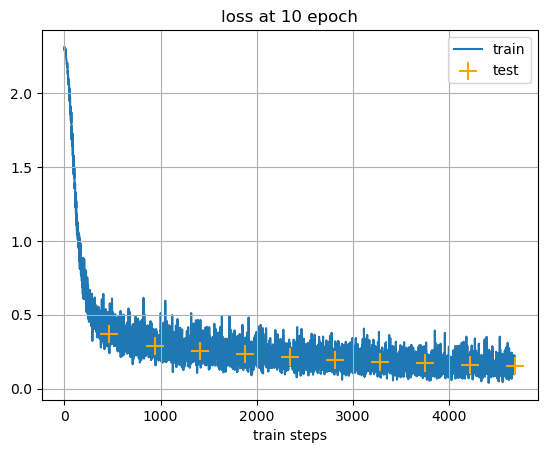

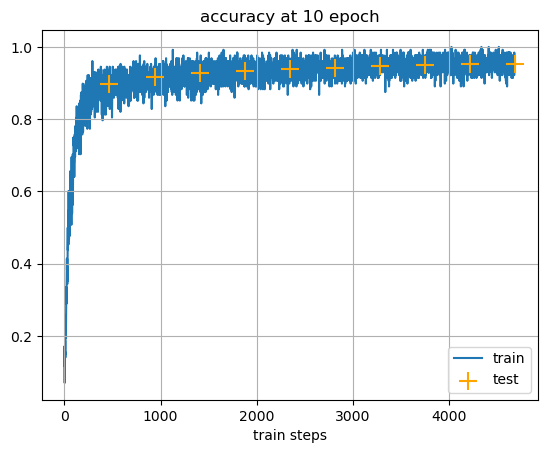

Last accuracy: 0.9532238924050633


In [30]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
last_accuracy = train_loop(model, opt, device=device)

#### Early stopping

In [34]:
def train_loop(model, opt, device: torch.device, epochs=100, early_stopping_epochs=3):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    best_metric_idx = 0
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt, device)
        test_loss, test_acc = test(model, device)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')

        # you can track any metric, important -- test
        assert len(test_acc_log[epoch]) == 2
        if test_acc_log[epoch][1] > test_acc_log[best_metric_idx][1]:
            best_metric_idx = epoch
            # good practice here is to save model on disk

        if epoch - best_metric_idx >= early_stopping_epochs:
            break

    return test_acc_log[best_metric_idx][1]

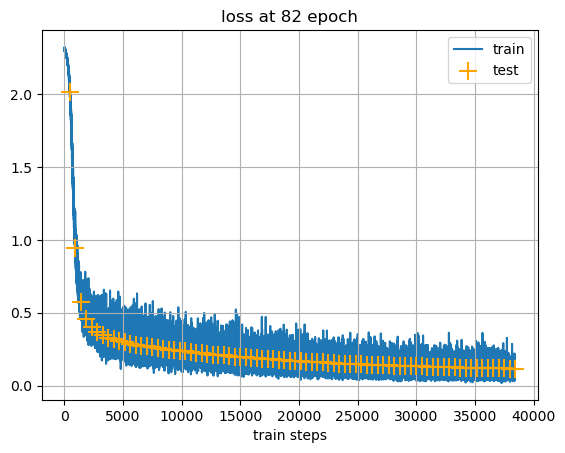

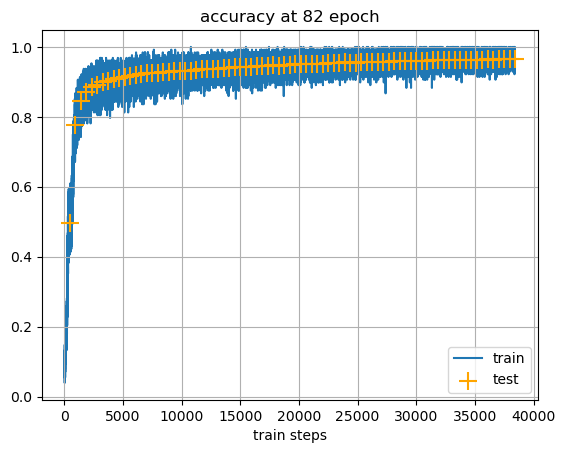

Last accuracy: 0.9647943037974683


In [35]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
last_accuracy = train_loop(model, opt, device=device, epochs=500)

#### Scheduler

In [49]:
def train_loop_with_sched(model: torch.nn.Module,
                          opt: torch.optim.Optimizer,
                          device: torch.device,
                          scheduler: torch.optim.lr_scheduler.LRScheduler,
                          epochs: int=100):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt, device=device)
        test_loss, test_acc = test(model, device=device)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')

        scheduler.step(np.mean(test_loss))

    return test_acc_log[-1][1]

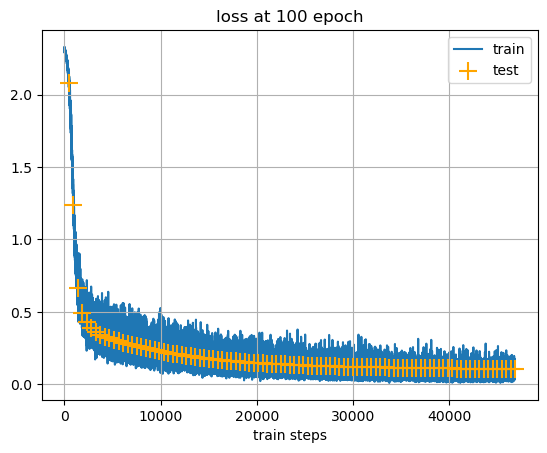

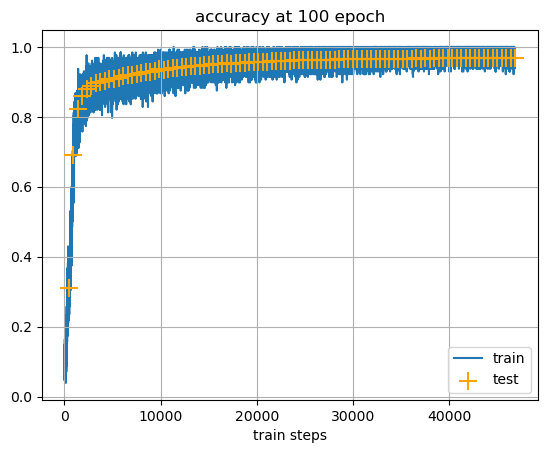

Last accuracy: 0.9673655063291139


In [38]:
model = Net().to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.0005, momentum=0.95)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, mode='min', threshold=1e-3, patience=3, verbose=True)
last_accuracy = train_loop_with_sched(model, opt, device=device, scheduler=scheduler)

To test other features in equal environment

In [39]:
def train_loop(model, opt, device: torch.device, epochs=10):
    train_log, train_acc_log = [],[]
    test_log, test_acc_log = [],[]

    steps = len(train_dataset) / train_batchsize
    for epoch in range(epochs):
        train_loss, train_acc = train_epoch(model, opt, device=device)
        test_loss, test_acc = test(model, device=device)

        # store metrics
        train_log.extend(train_loss)
        train_acc_log.extend(train_acc)

        test_log.append((steps * (epoch + 1), np.mean(test_loss)))
        test_acc_log.append((steps * (epoch + 1), np.mean(test_acc)))

        # plot all metrics (loss and acc for train/test)
        clear_output()
        plot_history(train_log, test_log, epoch)
        plot_history(train_acc_log, test_acc_log, epoch, title='accuracy')
        print(f'Last accuracy: {test_acc_log[-1][1]}')
    return test_acc_log[-1][1]

### All together

In [40]:
class Net(nn.Module):
    def __init__(self, hidden_size=512):
        super(Net, self).__init__()

        self.backbone = nn.Sequential(
            self.block_(embedding_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
        )
        self.classifier = nn.Linear(hidden_size, 10)

    def block_(self, features_in, features_out):
        # fully connected/feed-forward/linear
        fc = nn.Linear(features_in, features_out)
        # init for relu activation
        torch.nn.init.kaiming_uniform_(fc.weight, nonlinearity='relu')
        # batch norm
        bn = nn.BatchNorm1d(features_out)
        # activation
        relu = nn.ReLU()
        return nn.Sequential(fc, bn, relu)


    def forward(self, x):
        features = self.backbone(x)
        out = self.classifier(features)
        return out

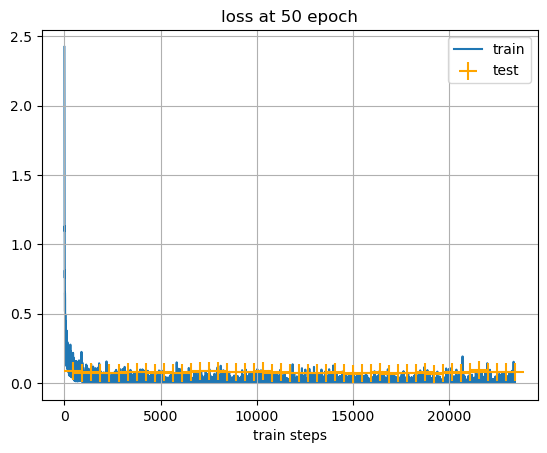

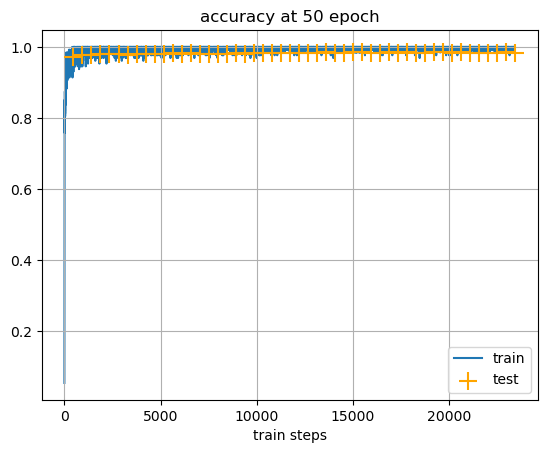

Last accuracy: 0.9838805379746836


In [42]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
last_accuracy = train_loop(model, opt, device=device, epochs=50)

As you see, model overfits for train data and has "no space" to improve

So let's add DropOut for regularization, and lr scheduler for reducing high learning rate if model found nice local optimum

In [44]:
class Net(nn.Module):
    def __init__(self, hidden_size=512):
        super(Net, self).__init__()

        self.backbone = nn.Sequential(
            self.block_(embedding_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            self.block_(hidden_size, hidden_size),
            nn.Dropout1d(p=0.2),
        )
        self.classifier = nn.Linear(hidden_size, 10)

    def block_(self, features_in, features_out):
        # fully connected/feed-forward/linear
        fc = nn.Linear(features_in, features_out)
        # init for relu activation
        torch.nn.init.kaiming_uniform_(fc.weight, nonlinearity='relu')
        # batch norm
        bn = nn.BatchNorm1d(features_out)
        # activation
        relu = nn.ReLU()
        return nn.Sequential(fc, bn, relu)


    def forward(self, x):
        features = self.backbone(x)
        out = self.classifier(features)
        return out

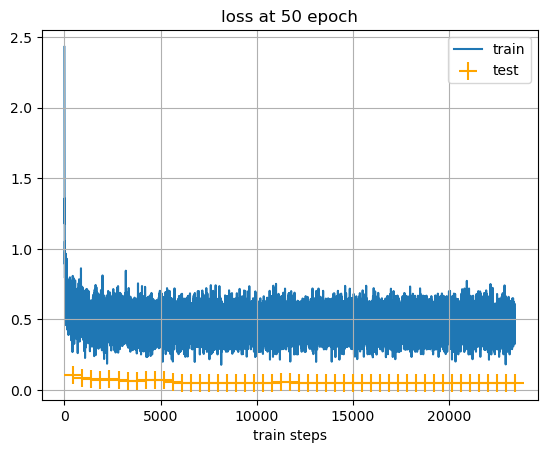

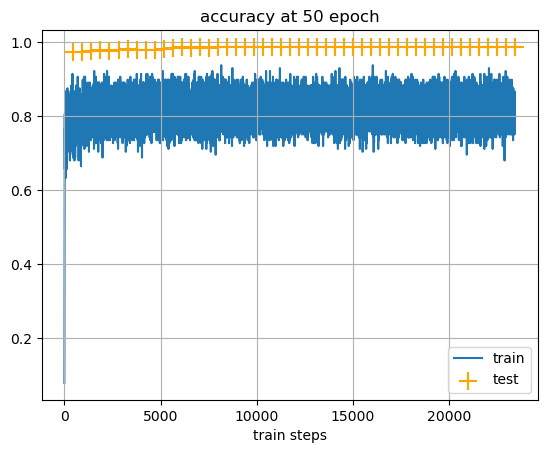

Last accuracy: 0.9859572784810127


In [50]:
model = Net().to(device)
opt = torch.optim.Adam(model.parameters(), lr=3e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', threshold=1e-3, patience=3, verbose=True)
last_accuracy = train_loop_with_sched(model, opt, device=device, scheduler=scheduler, epochs=50)

But usually we use not just the last version, but the best

The best accuracy on this learning curve was $0.9856606012658228$ at $49$th epoch